In [2]:
import scipy.io as sio
from utils import *

plt.rcParams['figure.figsize'] = [5, 5]

In [3]:
if not os.path.exists(f'./figures'):
    os.mkdir(f"./figures")
if not os.path.exists(f'./results'):
    os.mkdir(f"./results")
if not os.path.exists(f'./graphs'):
    os.mkdir(f"./graphs")

In [4]:
# Load all directories
subj_directory = '../Data/Glasser_FC_100UR_all/'

#Load subjects
fMRI_tasks = ['rfMRI_REST1_LR','tfMRI_EMOTION_LR','tfMRI_GAMBLING_LR','tfMRI_LANGUAGE_LR','tfMRI_MOTOR_LR','tfMRI_RELATIONAL_LR','tfMRI_SOCIAL_LR','tfMRI_WM_LR']
fixed_subj_prefix = '100_unrelated_sub_FC_374_'

# parcellation
fn_labels = ['VIS', 'SM', 'DA','VA','LIM','FP','DMN','SUBC']
task_labels = ['REST','EMOT','GAMB','LANG','MOT','REL','SOC','WM']


#Load Yeo's functional networks
full_yeo_network = '../Data/yeo_RS7_N374.mat'
yeo_network_data = sio.loadmat(full_yeo_network)
print(yeo_network_data.keys())
parcellation = yeo_network_data['yeoROIs'] - 1
parcellation = parcellation.flatten()

dict_keys(['__header__', '__version__', '__globals__', 'yeoOrder', 'yeoROIs'])


In [5]:
GA_FC_task = load_data(subj_directory, fixed_subj_prefix, fMRI_tasks[0])
GA_FC_task.shape

(374, 374)

# Persistent Homology

rfMRI_REST1_LR


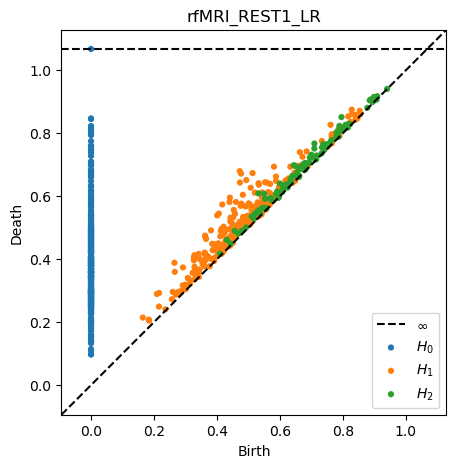

tfMRI_EMOTION_LR
tfMRI_GAMBLING_LR
tfMRI_LANGUAGE_LR
tfMRI_MOTOR_LR
tfMRI_RELATIONAL_LR
tfMRI_SOCIAL_LR
tfMRI_WM_LR


In [5]:
dgms_global_alltasks = persistent_homology_global(fMRI_tasks, subj_directory, fixed_subj_prefix)

In [6]:
d0_alltasks = compute_hausdorff(dgms_global_alltasks, len(task_labels), 'alltasks')
d1_alltasks = compute_wasserstein(dgms_global_alltasks, 1, len(task_labels), 'alltasks')
d2_alltasks = compute_wasserstein(dgms_global_alltasks, 2, len(task_labels), 'alltasks')

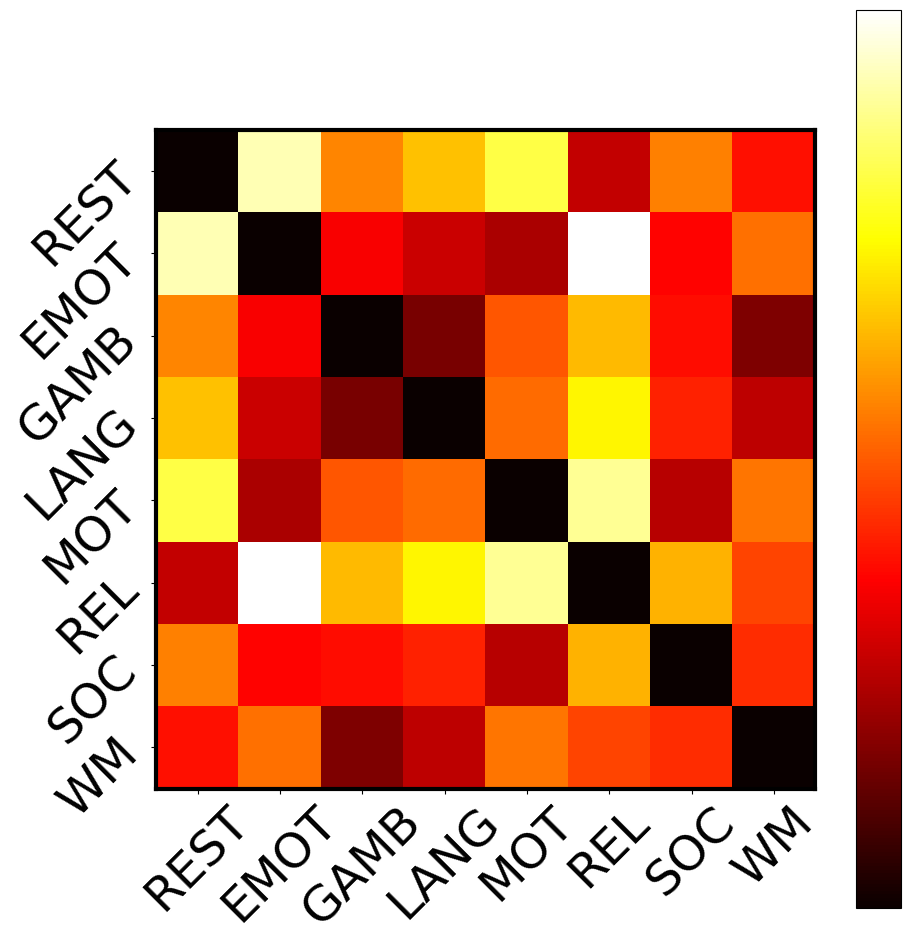

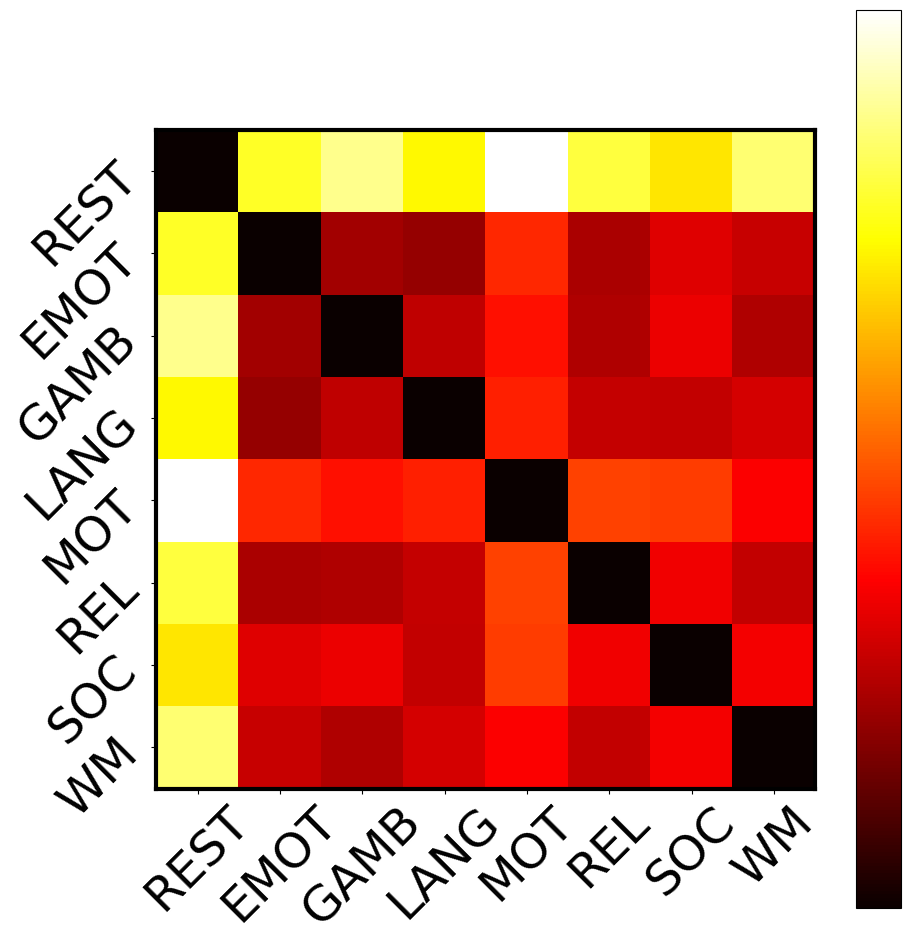

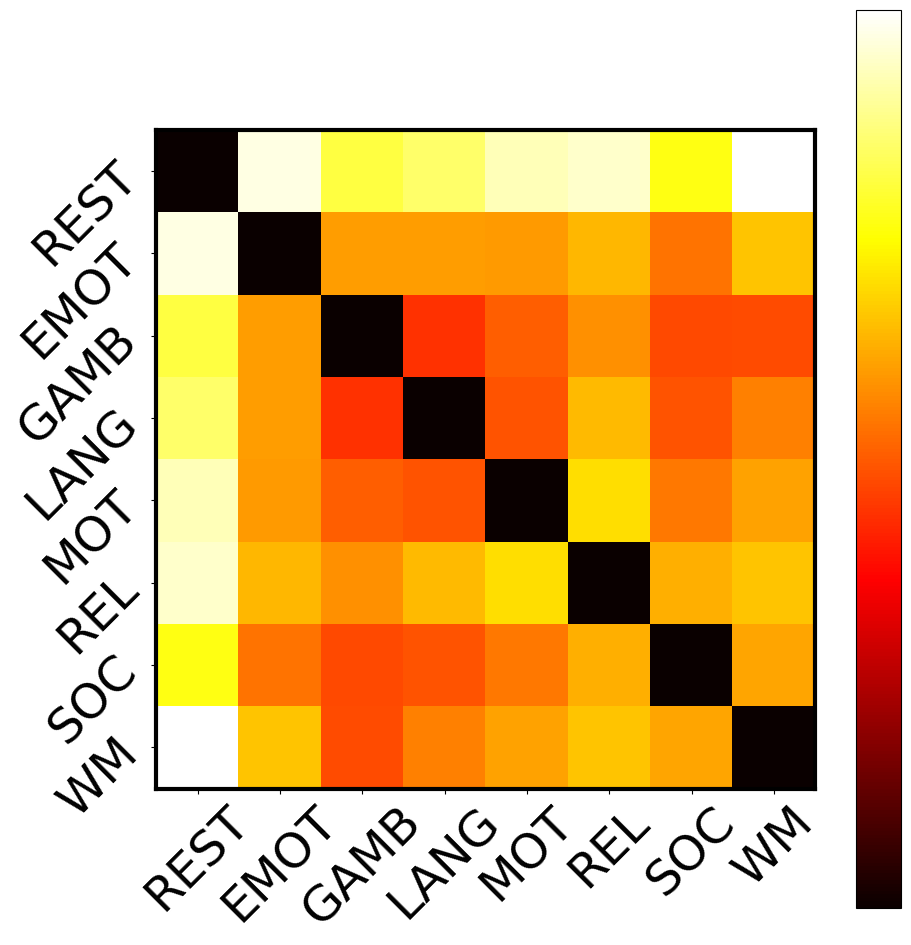

In [7]:
plot_hausdorff_distance(d0_alltasks, task_labels, 'alltasks')
plot_wasserstein_distance(d1_alltasks, 1, task_labels, 'alltasks')
plot_wasserstein_distance(d2_alltasks, 2, task_labels, 'alltasks')

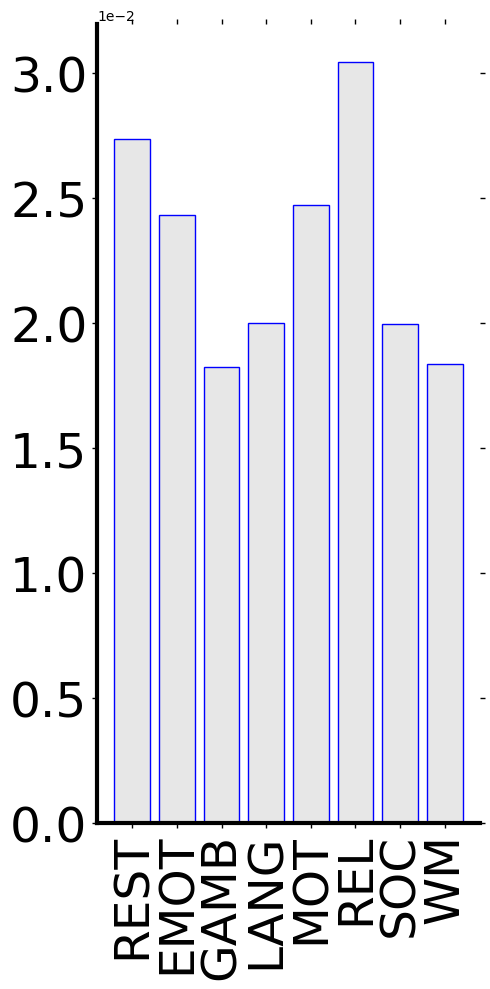

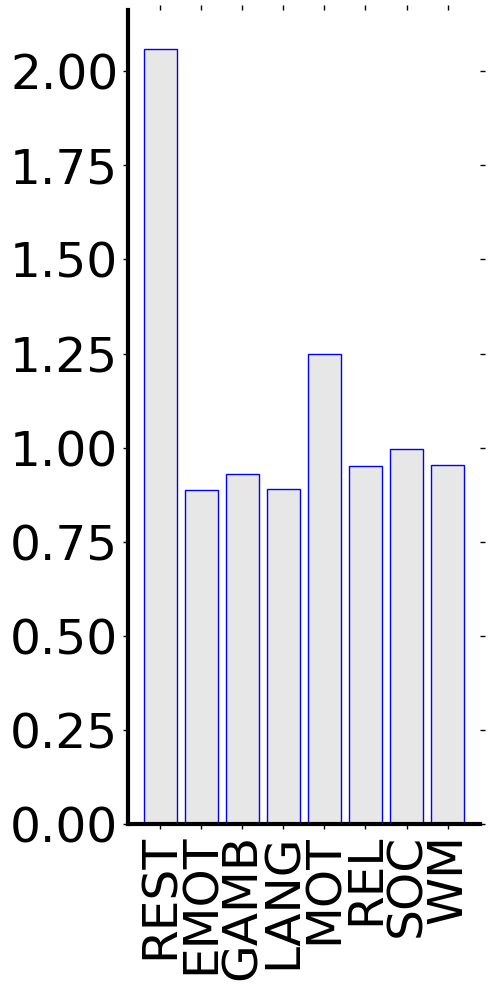

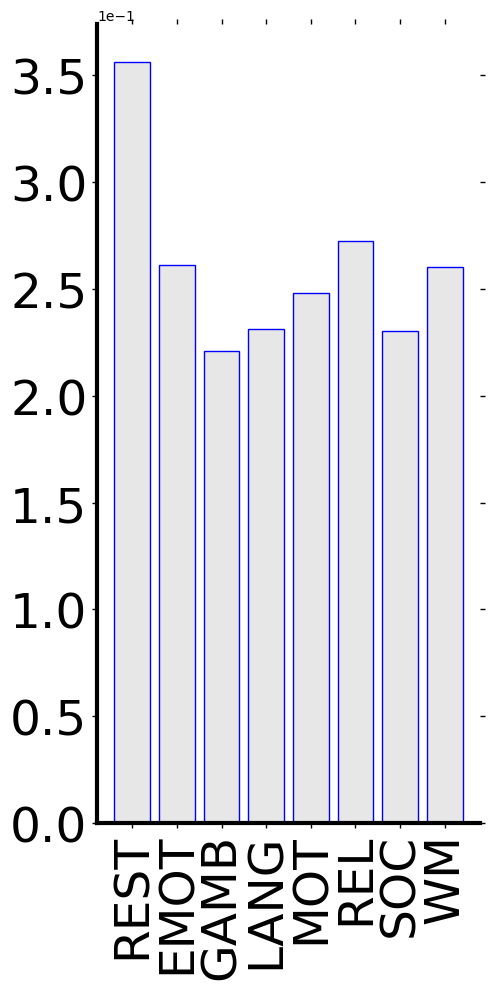

In [8]:
plot_averaged_distance(d0_alltasks, task_labels, 'H0_alltask')
plot_averaged_distance(d1_alltasks, task_labels, 'H1_alltask')
plot_averaged_distance(d2_alltasks, task_labels, 'H2_alltask')

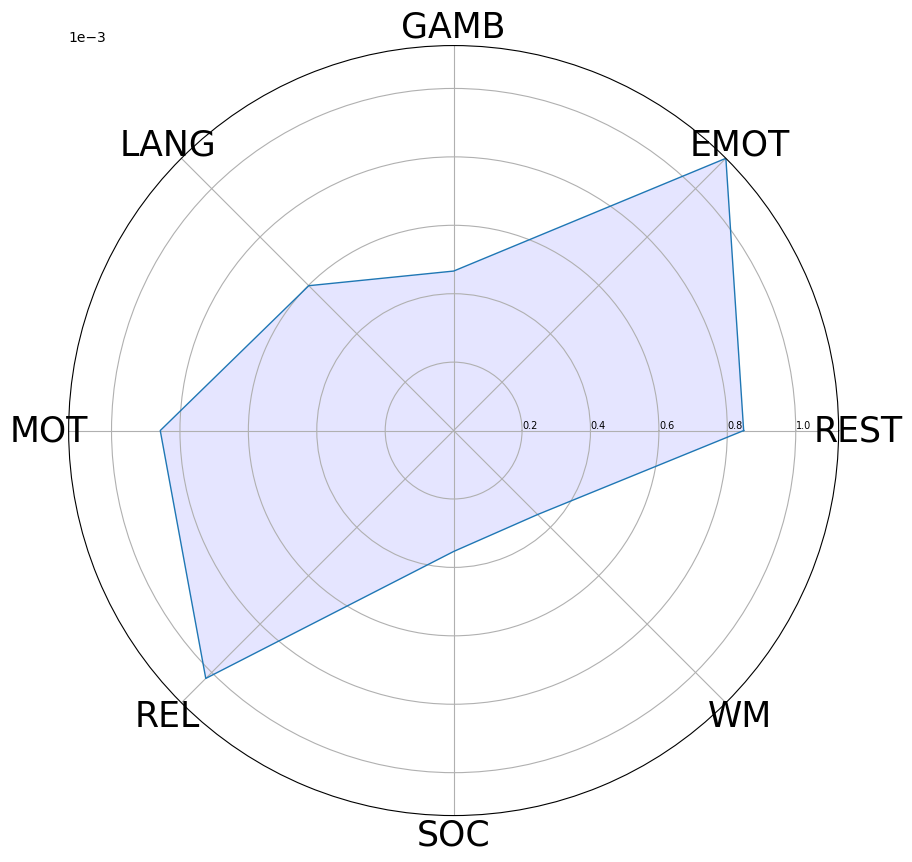

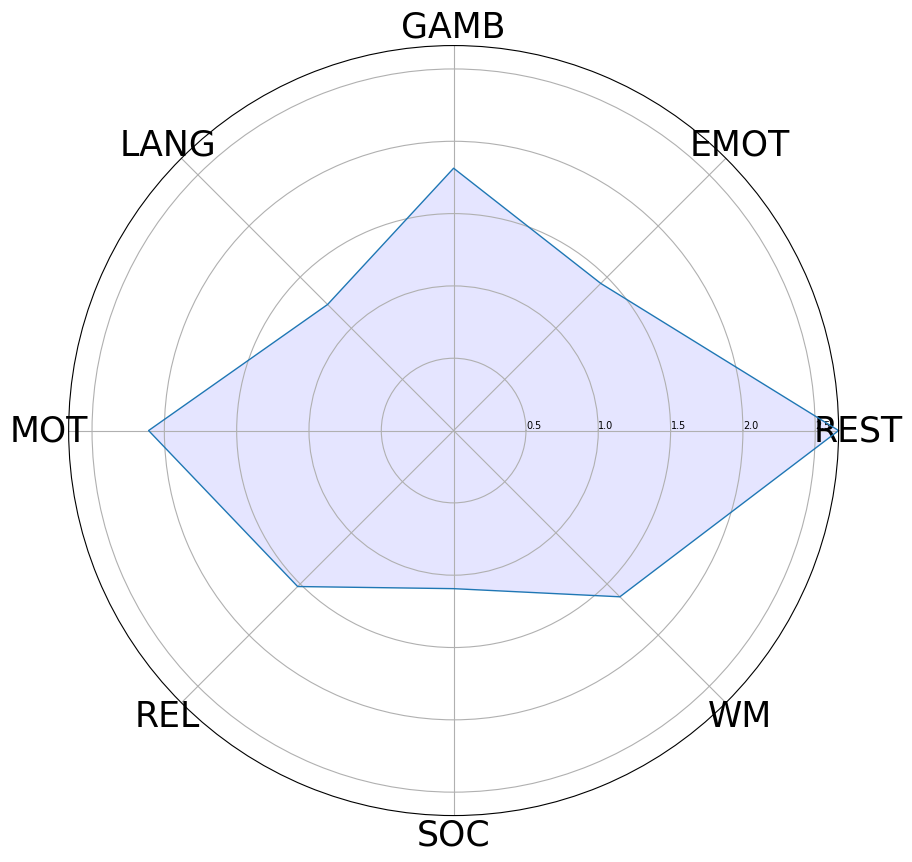

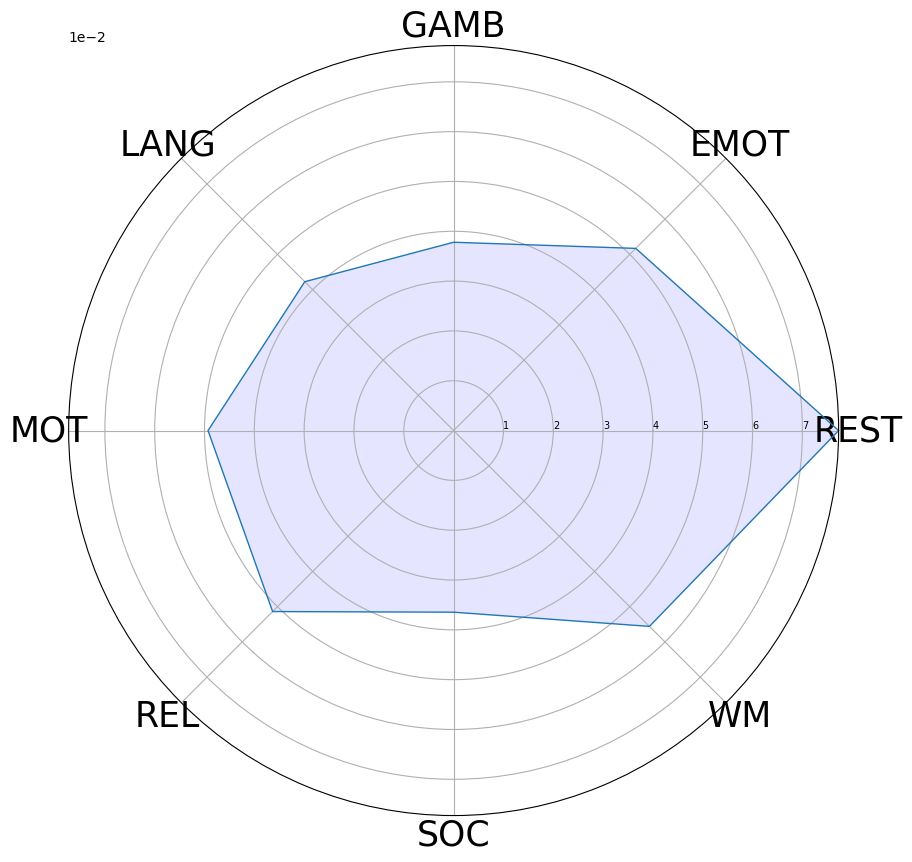

In [9]:
plot_variance(d0_alltasks, task_labels, 'H0_alltask')
plot_variance(d1_alltasks, task_labels, 'H1_alltask')
plot_variance(d2_alltasks, task_labels, 'H2_alltask')